# Gender detection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Feature_Extraction import *
from utils2 import *
import glob, os

import os
from os import listdir
from os.path import isfile, join

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

path = os.getcwd() + '/'
path_images = path + 'data/FASSEG-frontal03/'
sub_dir_original = 'Original/' # 'Original/' ou 'Train_RGB/'
sub_dir_labeled = 'Labeled/' # 'Labeled/' ou 'Train_Labels/'
sub_dir_newlabel = 'New_label/'

## import

In [2]:
dataset_size = 149 # Nb of images to take in dataset
images, raw_labels, names = import_gender_dataset(path_images,sub_dir_labeled,dataset_size)

## Extract labels

In [4]:
labels = extract_label(images)

Extracting labels :

0 / 149
1 / 149
2 / 149
3 / 149
4 / 149
5 / 149
6 / 149
7 / 149
8 / 149
9 / 149
10 / 149
11 / 149
12 / 149
13 / 149
14 / 149
15 / 149
16 / 149
17 / 149
18 / 149
19 / 149
20 / 149
21 / 149
22 / 149
23 / 149
24 / 149
25 / 149
26 / 149
27 / 149
28 / 149
29 / 149
30 / 149
31 / 149
32 / 149
33 / 149
34 / 149
35 / 149
36 / 149
37 / 149
38 / 149
39 / 149
40 / 149
41 / 149
42 / 149
43 / 149
44 / 149
45 / 149
46 / 149
47 / 149
48 / 149
49 / 149
50 / 149
51 / 149
52 / 149
53 / 149
54 / 149
55 / 149
56 / 149
57 / 149
58 / 149
59 / 149
60 / 149
61 / 149
62 / 149
63 / 149
64 / 149
65 / 149
66 / 149
67 / 149
68 / 149
69 / 149
70 / 149
71 / 149
72 / 149
73 / 149
74 / 149
75 / 149
76 / 149
77 / 149
78 / 149
79 / 149
80 / 149
81 / 149
82 / 149
83 / 149
84 / 149
85 / 149
86 / 149
87 / 149
88 / 149
89 / 149
90 / 149
91 / 149
92 / 149
93 / 149
94 / 149
95 / 149
96 / 149
97 / 149
98 / 149
99 / 149
100 / 149
101 / 149
102 / 149
103 / 149
104 / 149
105 / 149
106 / 149
107 / 149
108 / 149

## Save array

In [3]:
# save_array(path_images, sub_dir_newlabel, labels, names)

## Load array

In [4]:
ind2labels = load_all_array(path_images, sub_dir_newlabel)

## Smoothing labels

In [5]:
ind2newlabels = {key: smooth_image(image) for key, image in ind2labels.items()}

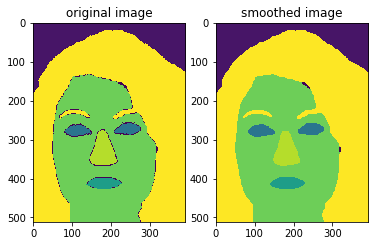

In [6]:
ind = 9

plt.subplot(1,2,1)
plt.imshow(ind2labels[ind])
plt.title('original image')
plt.subplot(1,2,2)
plt.imshow(ind2newlabels[ind])
plt.title('smoothed image')
plt.show()

## Extract key points

In [7]:
ind2distances = {key:find_distances(image) for key, image in ind2newlabels.items()}

In [8]:
ind2distances

{149: {'d_mouth_h': 102,
  'd_mouth_v': 27,
  'd_nose_h': 55,
  'd_nose_v': 73,
  'd_eye_h': 157,
  'd_eye_v': 23,
  'd_skin_h': 278,
  'd_skin_v': 422,
  'r1': 33,
  'r2': 22,
  'r3': 54,
  'r4': 48,
  'r5': 49,
  'r6': 72,
  'v1': 149,
  'v2': 99,
  'v3': 72,
  'v4': 95,
  'v5': 127,
  'v6': 100,
  'v7': 66},
 148: {'d_mouth_h': 99,
  'd_mouth_v': 40,
  'd_nose_h': 71,
  'd_nose_v': 94,
  'd_eye_h': 172,
  'd_eye_v': 24,
  'd_skin_h': 364,
  'd_skin_v': 400,
  'r1': 37,
  'r2': 36,
  'r3': 59,
  'r4': 42,
  'r5': 145,
  'r6': 47,
  'v1': 174,
  'v2': 110,
  'v3': 86,
  'v4': 110,
  'v5': 158,
  'v6': 118,
  'v7': 111},
 147: {'d_mouth_h': 100,
  'd_mouth_v': 33,
  'd_nose_h': 69,
  'd_nose_v': 121,
  'd_eye_h': 205,
  'd_eye_v': 39,
  'd_skin_h': 353,
  'd_skin_v': 444,
  'r1': 71,
  'r2': 34,
  'r3': 76,
  'r4': 60,
  'r5': 42,
  'r6': 106,
  'v1': 181,
  'v2': 109,
  'v3': 83,
  'v4': 122,
  'v5': 180,
  'v6': 147,
  'v7': 67},
 146: {'d_mouth_h': 123,
  'd_mouth_v': 43,
  'd_nose_

## Extract volumes of labels

In [8]:
ind2volumes = {key: extract_volumes(image) for key, image in ind2newlabels.items()}

In [9]:
ind2volumes

{149: {'volume_mouth': 0.011403729838709678,
  'volume_eyes': 0.009681619623655914,
  'volume_nose': 0.016071278561827957,
  'volume_hair': 0.30191007224462363,
  'volume_skin': 0.44784316196236557},
 148: {'volume_mouth': 0.01456190664556962,
  'volume_eyes': 0.009078322784810126,
  'volume_nose': 0.024866495253164558,
  'volume_hair': 0.256279667721519,
  'volume_skin': 0.4625692246835443},
 147: {'volume_mouth': 0.01248785621761658,
  'volume_eyes': 0.012897708873056996,
  'volume_nose': 0.02806225712435233,
  'volume_hair': 0.34386637791450775,
  'volume_skin': 0.5368715592616581},
 146: {'volume_mouth': 0.018574316896984924,
  'volume_eyes': 0.01167458385678392,
  'volume_nose': 0.02810438913316583,
  'volume_hair': 0.29765526853015073,
  'volume_skin': 0.4719937578517588},
 145: {'volume_mouth': 0.013598703170028818,
  'volume_eyes': 0.013322901657060519,
  'volume_nose': 0.025998514048991353,
  'volume_hair': 0.27960644812680113,
  'volume_skin': 0.4194434438040346},
 144: {'vol

# Prediction

In [10]:
X1 = pd.DataFrame(ind2volumes).T.sort_index()
X2 = pd.DataFrame(ind2distances).T.sort_index()
X = pd.concat([X1, X2], axis = 1)
y_dict = get_gender_dict()
X['index'] = X.index
X['target'] = X['index'].apply(lambda x: y_dict[x])
display(X.head())

y = X['target']
X.drop(columns = ['index', 'target'], inplace = True)

,volume_eyes,volume_hair,volume_mouth,volume_nose,volume_skin,d_eye_h,d_eye_v,d_mouth_h,d_mouth_v,d_nose_h,...,r6,v1,v2,v3,v4,v5,v6,v7,index,target
1,0.019062,0.253370,0.018771,0.037385,0.519453,209,34,122,38,86,...,86,194,122,96,130,185,147,109,1,M
2,0.017203,0.319531,0.019315,0.030173,0.487701,206,40,114,39,80,...,80,178,99,77,117,168,129,112,2,M
3,0.010544,0.300518,0.012035,0.027591,0.465032,196,28,98,31,75,...,89,171,112,85,113,155,124,124,3,M
4,0.010203,0.348139,0.011522,0.022927,0.455780,177,25,86,33,66,...,40,172,114,80,105,156,123,112,4,M
5,0.012226,0.264695,0.012855,0.021602,0.383883,190,27,112,32,66,...,82,178,119,89,116,161,129,104,5,F


## Train / Test split

We use 80% of images for training and 20% for testing.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, )

## Scaler

## Models

### SVM

In [12]:
from sklearn.metrics import f1_score

svm = LinearSVC(max_iter = 500000)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           F       0.92      0.52      0.67        21
           M       0.62      0.94      0.74        17

   micro avg       0.71      0.71      0.71        38
   macro avg       0.77      0.73      0.71        38
weighted avg       0.78      0.71      0.70        38

0.7105263157894737


C:\Users\Florian Bettini\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Random Forest

In [15]:
model = RandomForestClassifier(n_estimators=100, max_depth = 15, n_jobs=-1) #, max_depth=10, n_estimators=15, criterion='entropy', min_samples_split = 0.001)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           F       0.89      0.76      0.82        21
           M       0.75      0.88      0.81        17

   micro avg       0.82      0.82      0.82        38
   macro avg       0.82      0.82      0.82        38
weighted avg       0.83      0.82      0.82        38

0.8157894736842105


### Feature importances

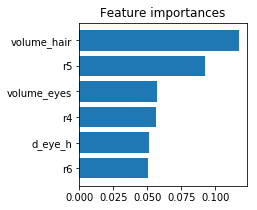

In [107]:
importances = model.feature_importances_
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure(figsize = (3,3))
plt.title("Feature importances")
plt.barh(list(X.columns[indices])[-6:], importances[indices][-6:], align="center")
plt.show()

## Feature importances: explanation

### r5: distance between eye and skin

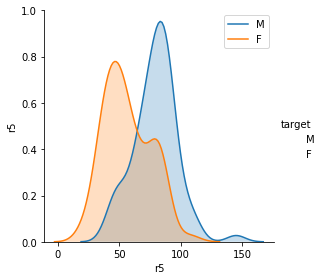

In [73]:
X['target'] = y
sns.pairplot(X[['r5', 'target']], hue = 'target', height = 4)
plt.legend()
plt.show()

### hair volume

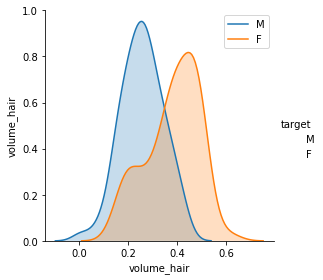

In [75]:
sns.pairplot(X[['volume_hair', 'target']], hue = 'target', height = 4)
plt.legend()
plt.show()

### r4: distance between eye and nose

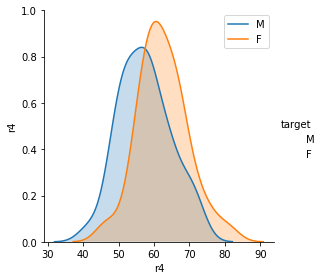

In [76]:
sns.pairplot(X[['r4', 'target']], hue = 'target', height = 4)
plt.legend()
plt.show()

### nose volume

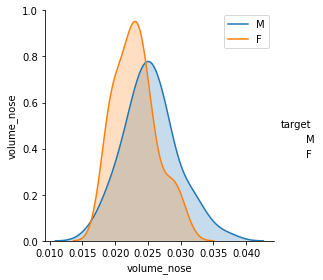

In [77]:
sns.pairplot(X[['volume_nose', 'target']], hue = 'target', height = 4)
plt.legend()
plt.show()

### eye volume

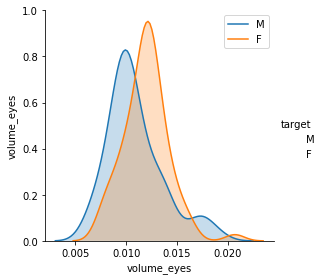

In [79]:
sns.pairplot(X[['volume_eyes', 'target']], hue = 'target', height = 4)
plt.legend()
plt.show()

# Head Pose Estimation


personne08152+0+90.bmp


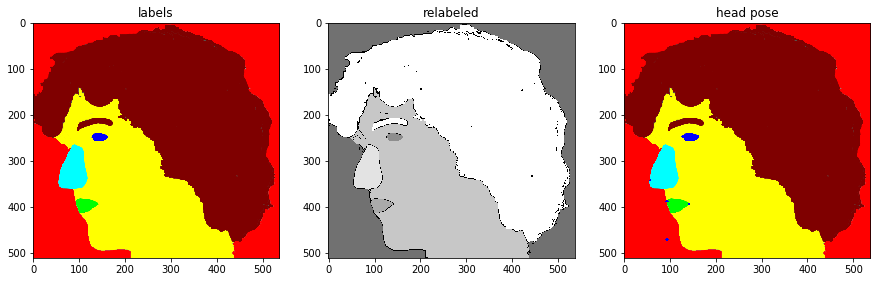


personne08252+0+90.bmp


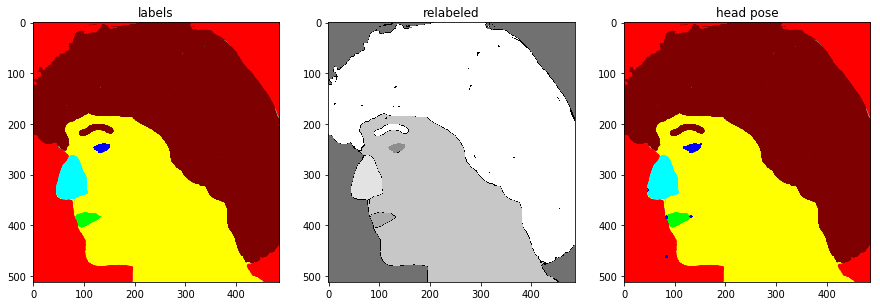


personne09152+0+90.bmp


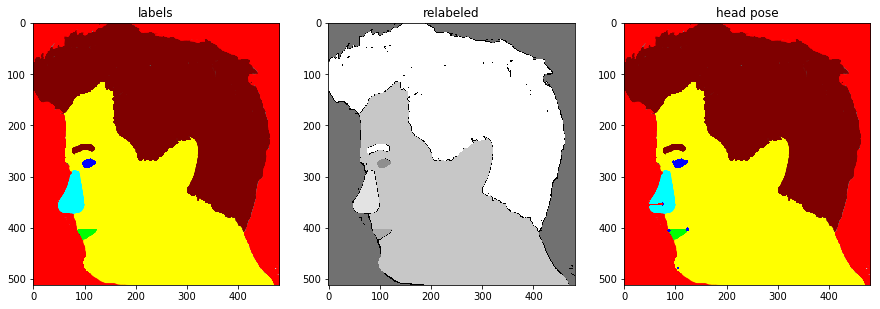


personne09252+0+90.bmp


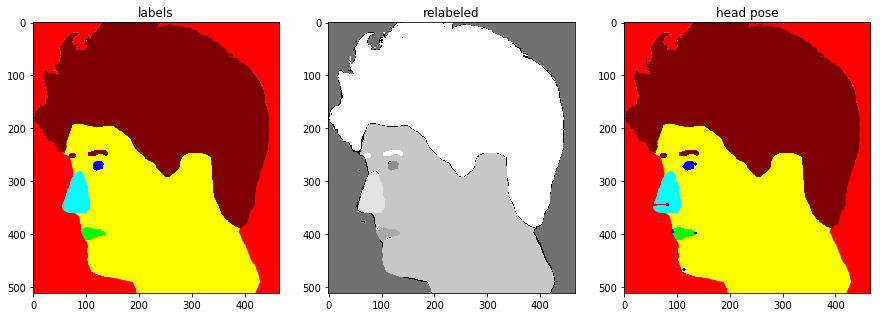


personne10152+0+90.bmp


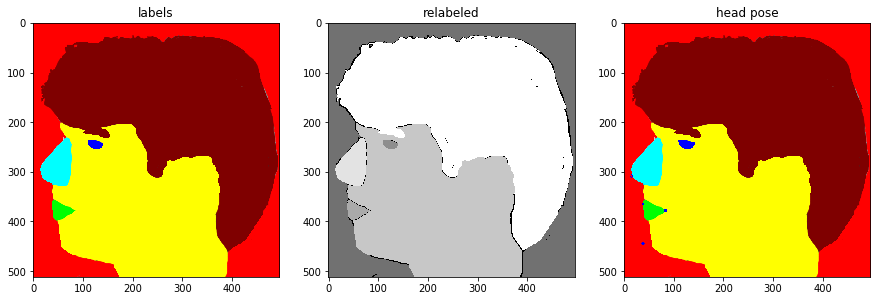


personne10252+0+90.bmp


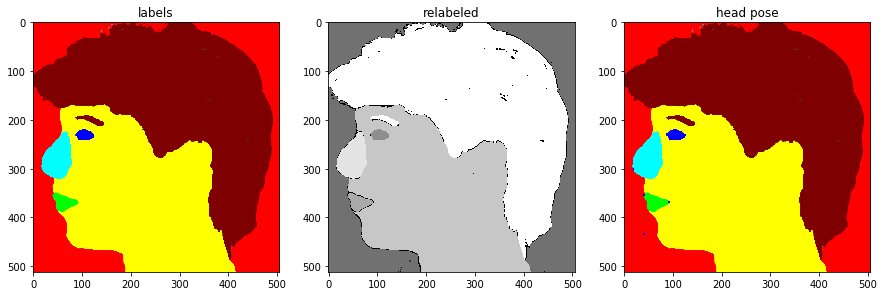


personne11152+0+90.bmp


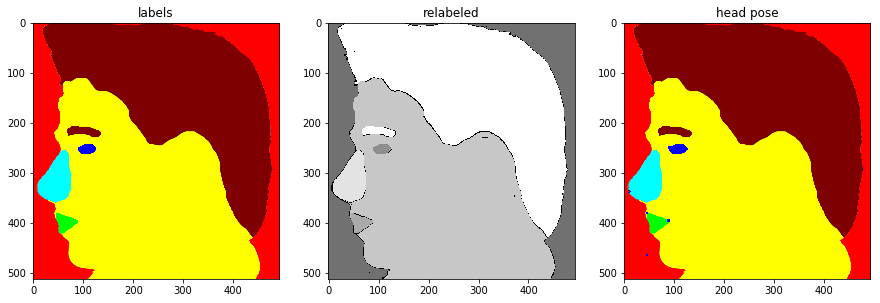


personne11252+0+90.bmp


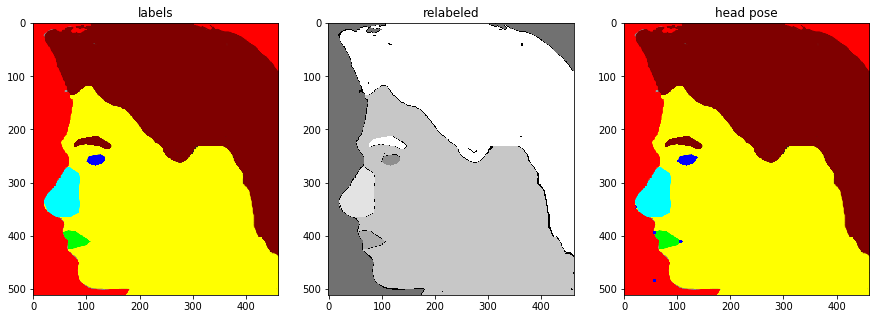


personne12152+0+90.bmp


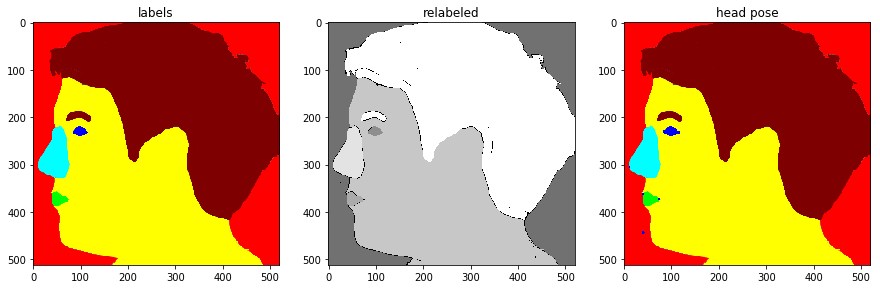


personne12252+0+90.bmp


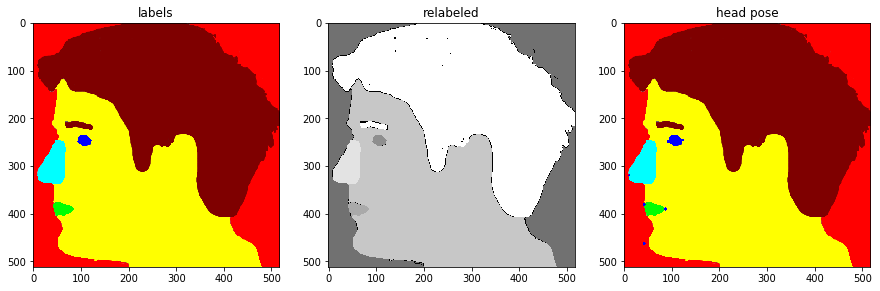


personne13152+0+90.bmp


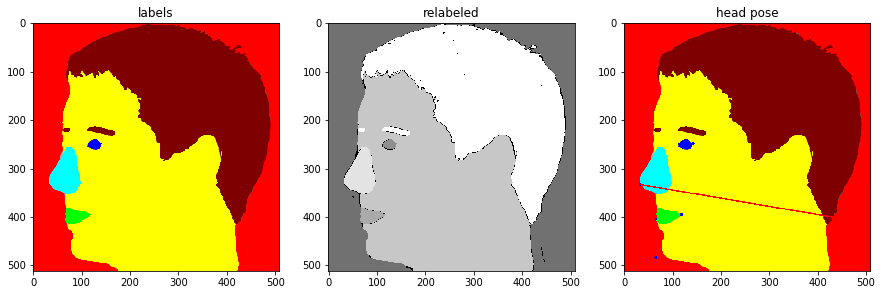


personne13252+0+90.bmp


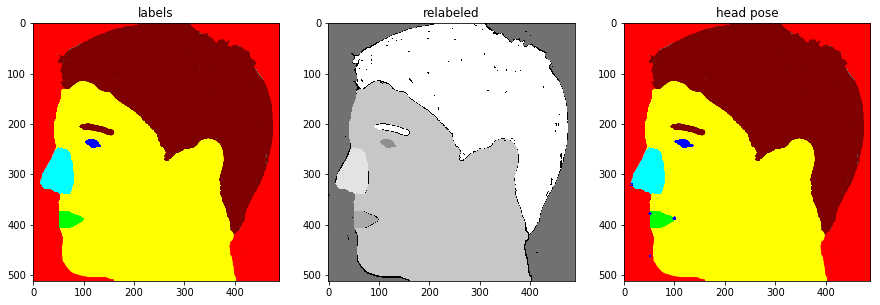


personne14152+0+90.bmp


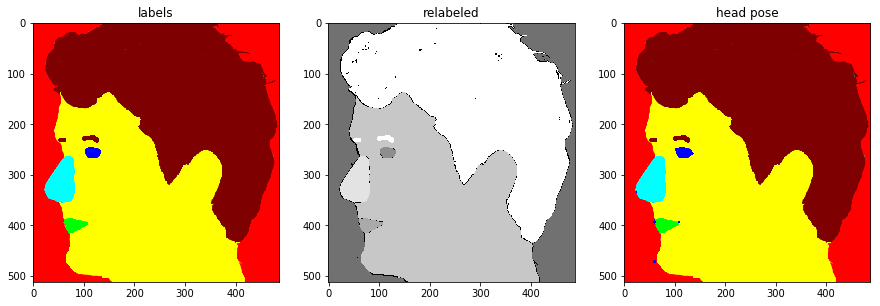


personne14252+0+90.bmp


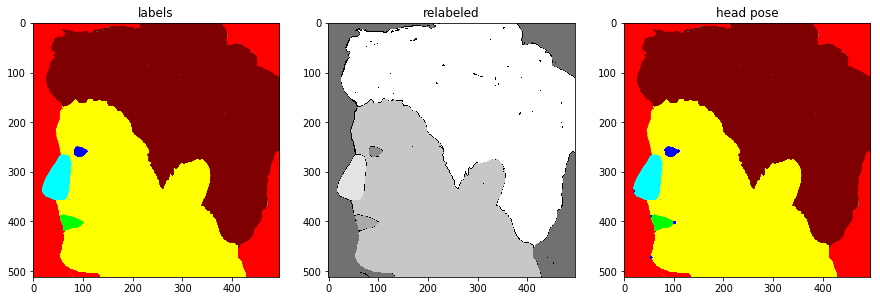


personne15152+0+90.bmp


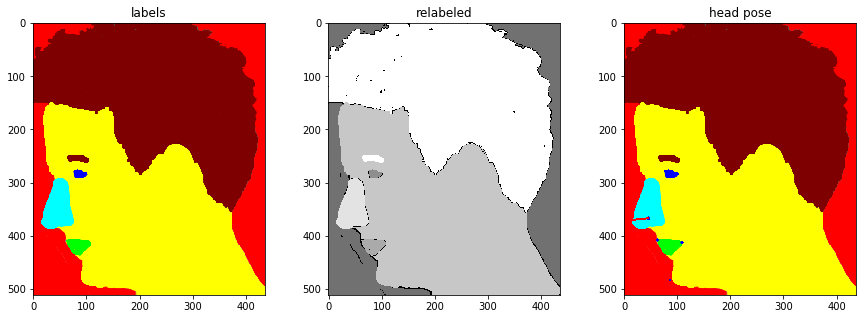


personne15252+0+90.bmp


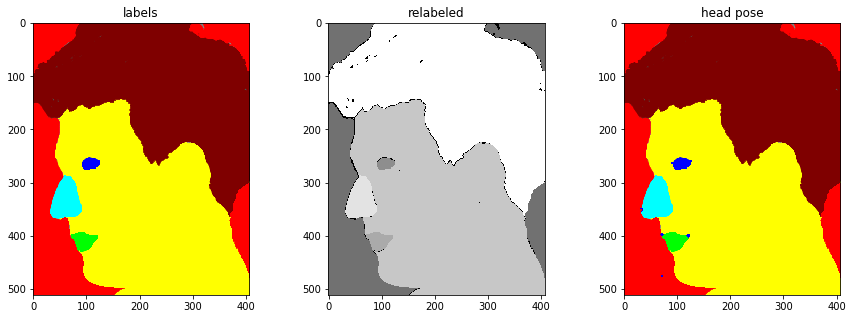


personne08150+0+60.bmp


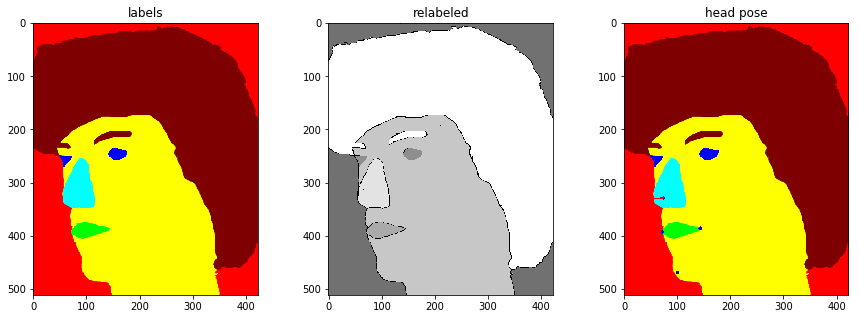


personne08250+0+60.bmp


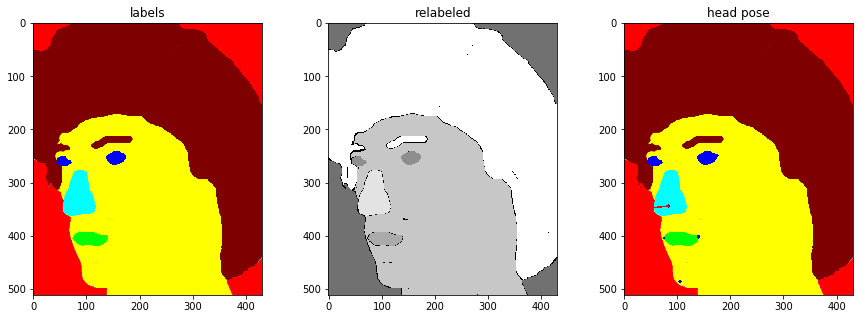


personne09150+0+60.bmp


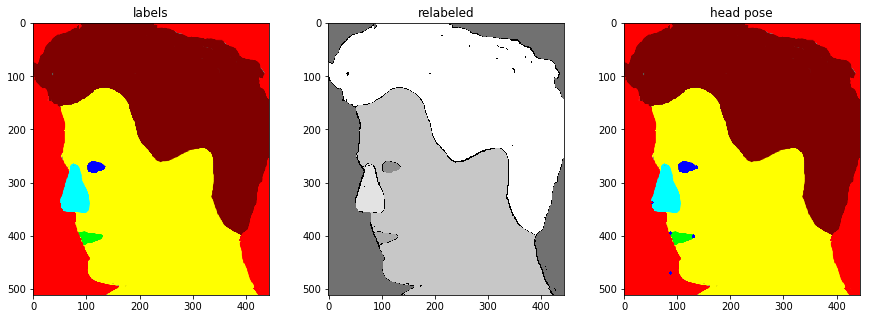


personne09250+0+60.bmp


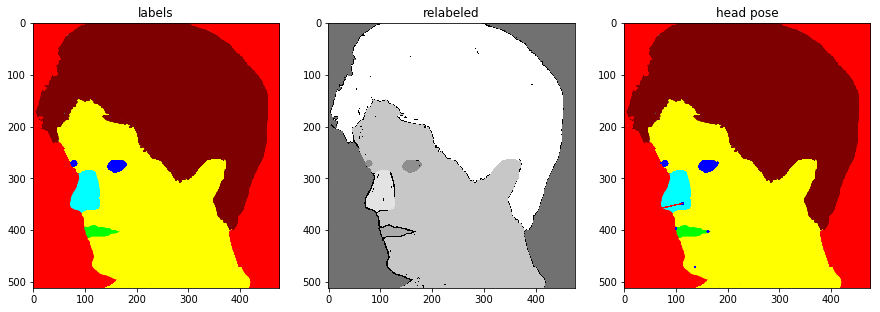


personne10150+0+60.bmp


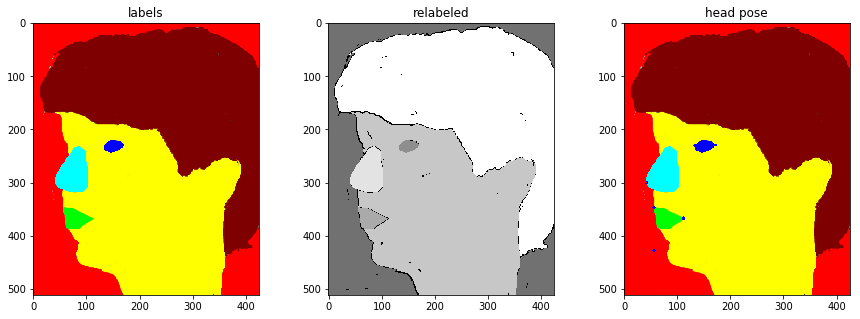


personne10250+0+60.bmp


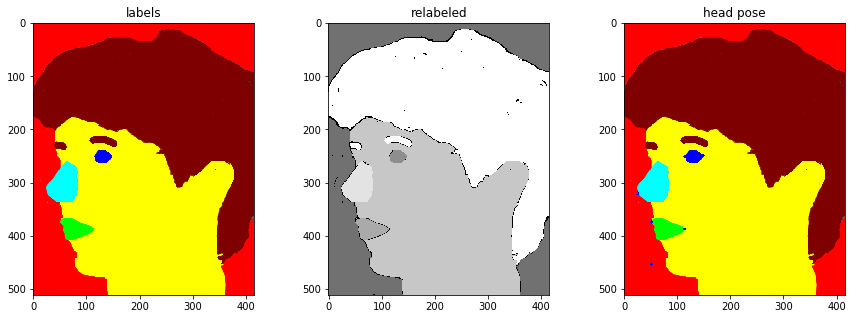


personne11150+0+60.bmp


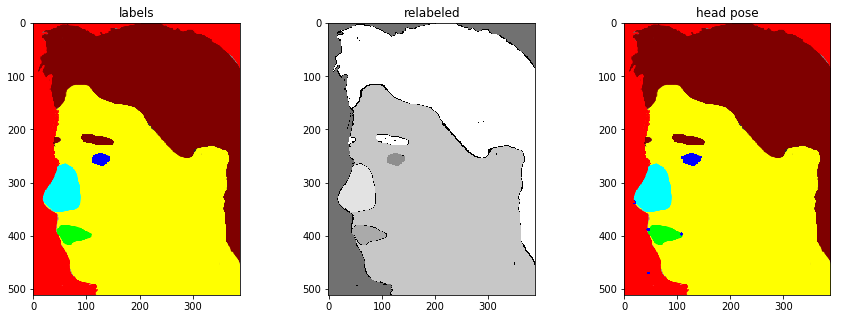


personne11250+0+60.bmp


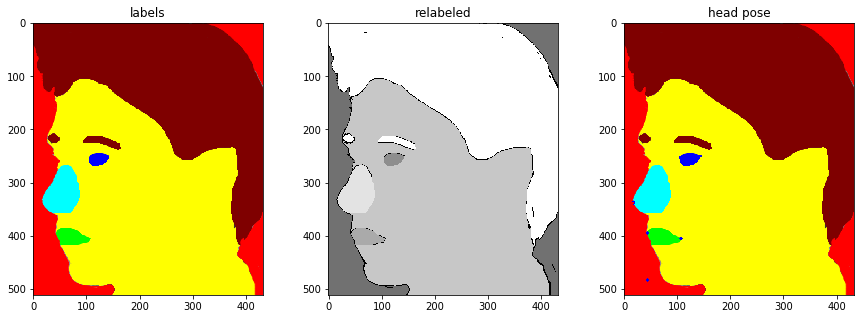


personne12150+0+60.bmp


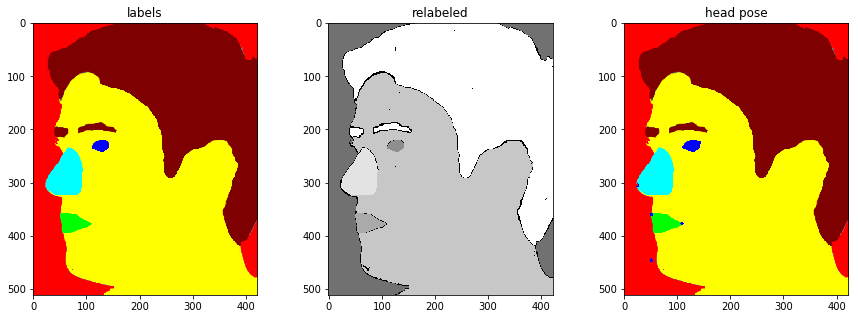


personne12250+0+60.bmp


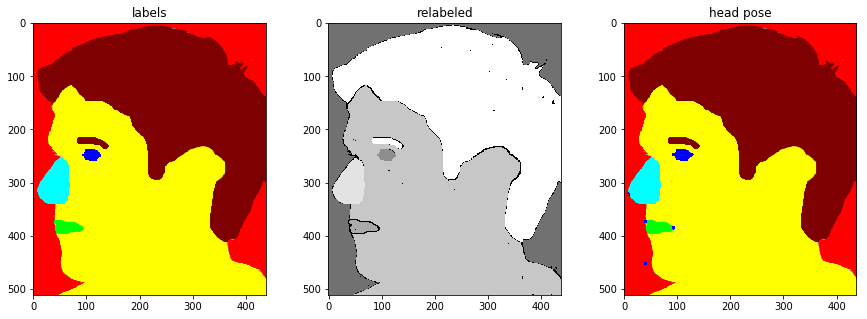


personne13150+0+60.bmp


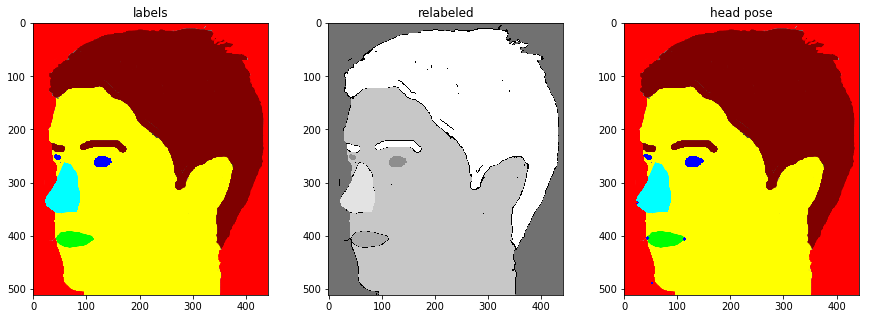


personne13250+0+60.bmp


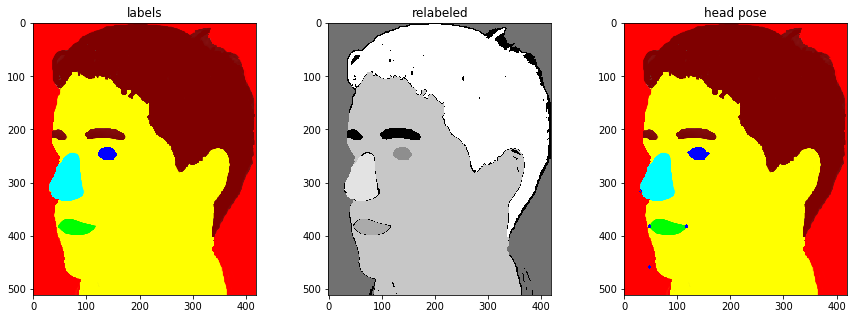


personne14150+0+60.bmp


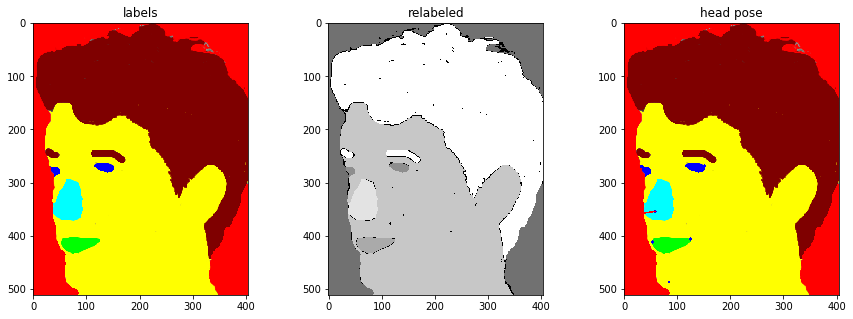


personne14250+0+60.bmp


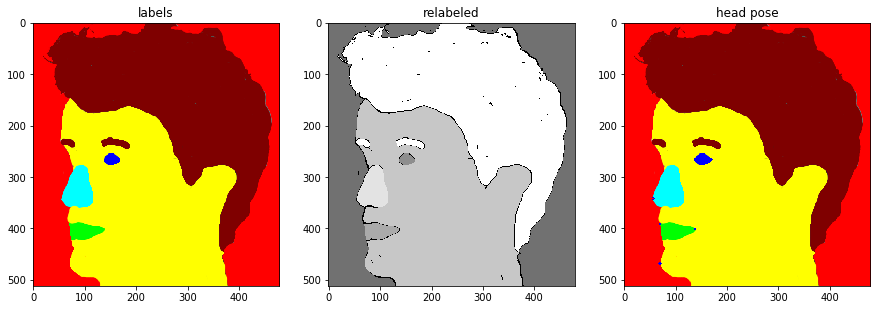


personne15150+0+60.bmp


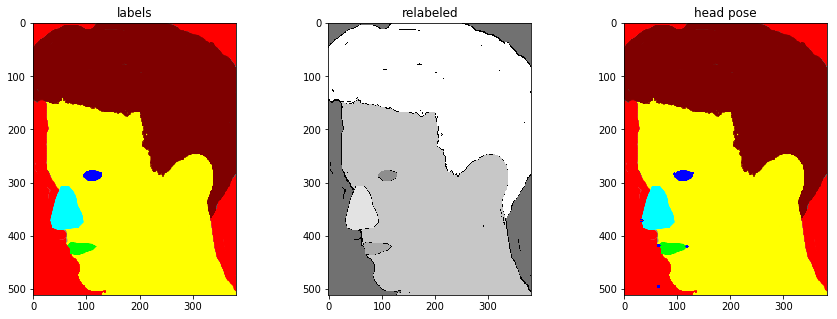


personne15250+0+60.bmp


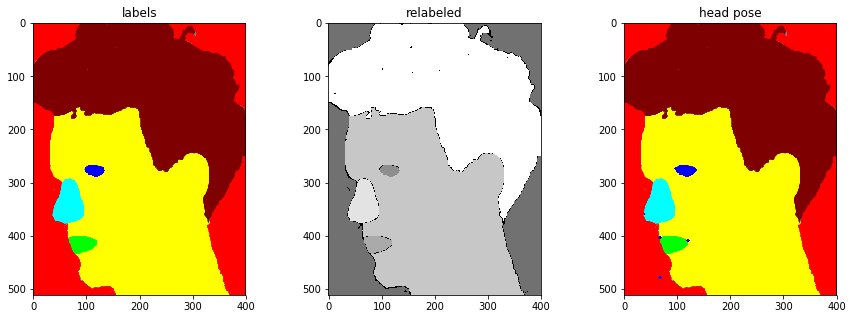


personne08148+0+30.bmp


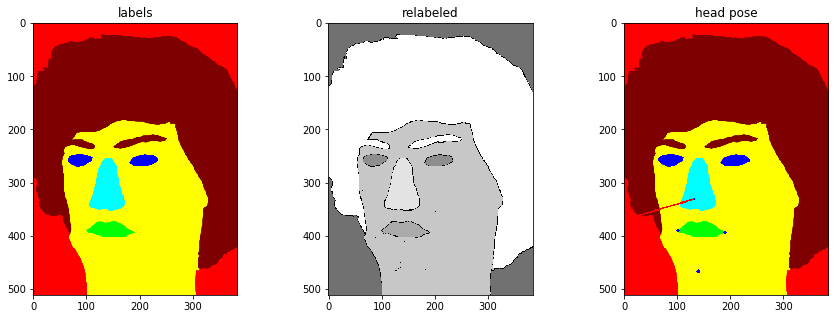


personne08248+0+30.bmp


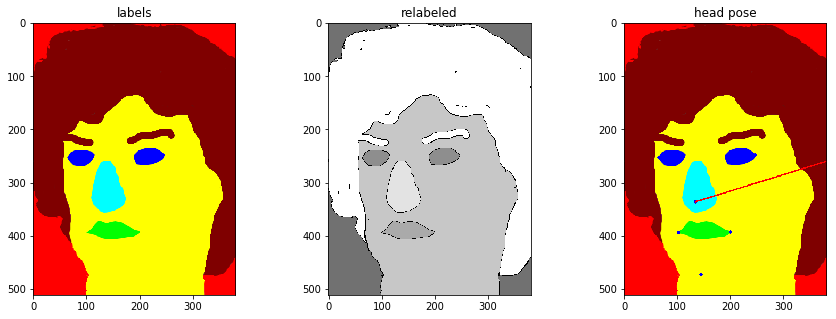


personne09148+0+30.bmp


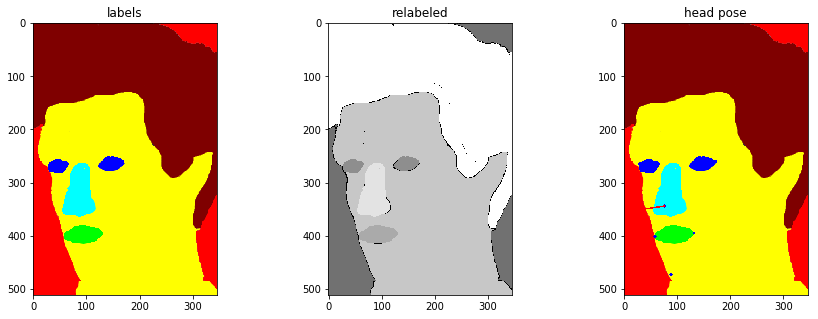


personne09248+0+30.bmp


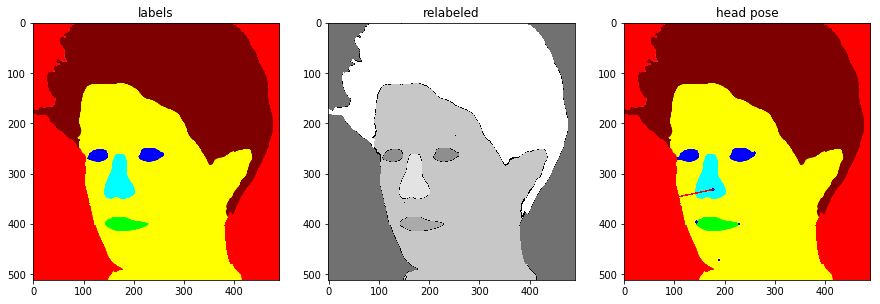


personne10148+0+30.bmp


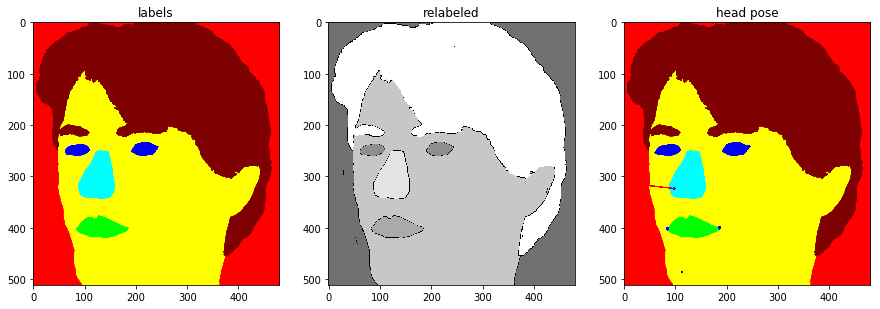


personne10248+0+30.bmp


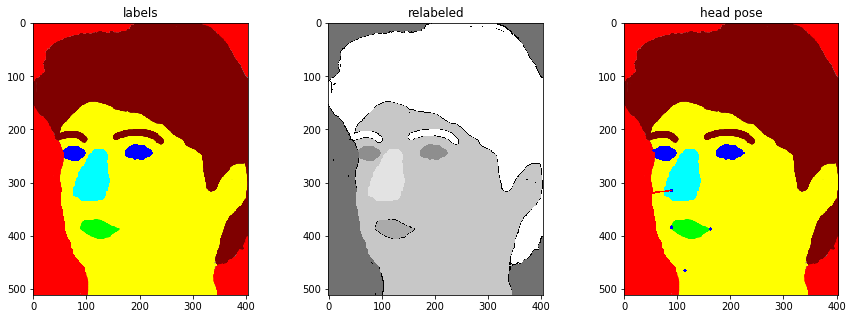


personne11148+0+30.bmp


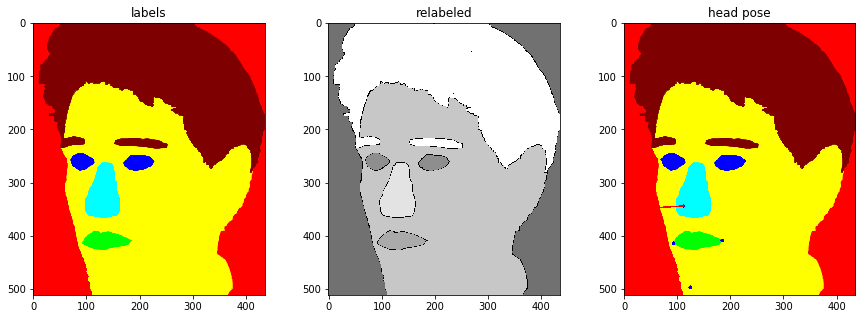


personne11248+0+30.bmp


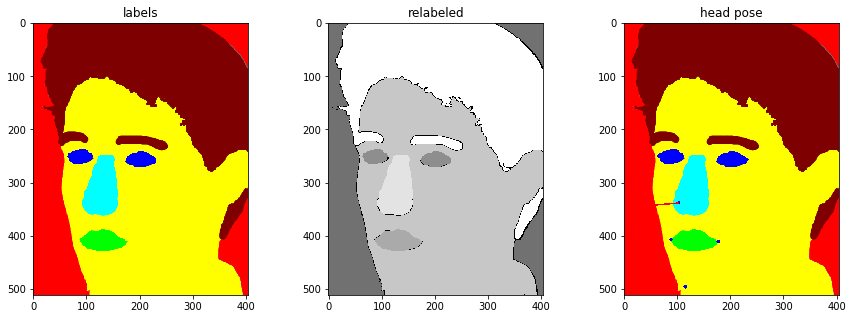


personne12148+0+30.bmp


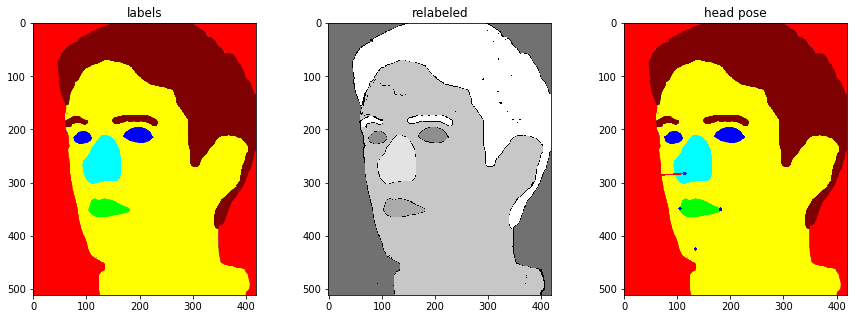


personne12248+0+30.bmp


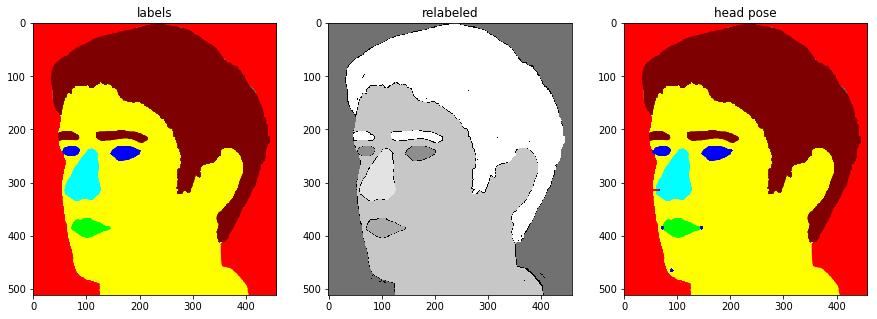


personne13148+0+30.bmp


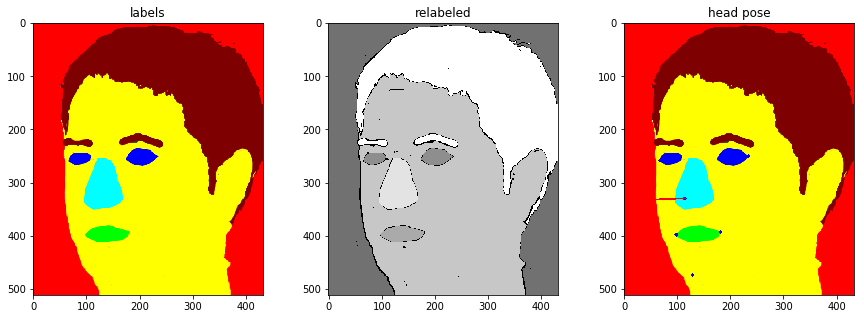


personne13248+0+30.bmp


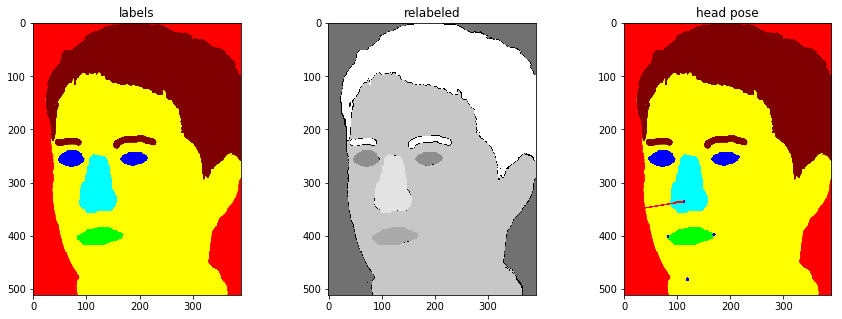


personne14148+0+30.bmp


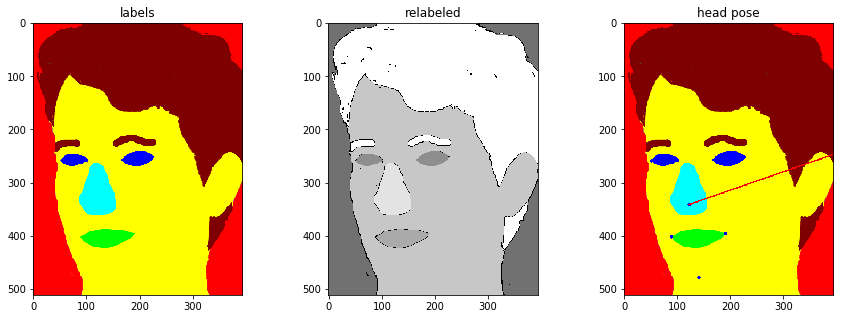


personne14248+0+30.bmp


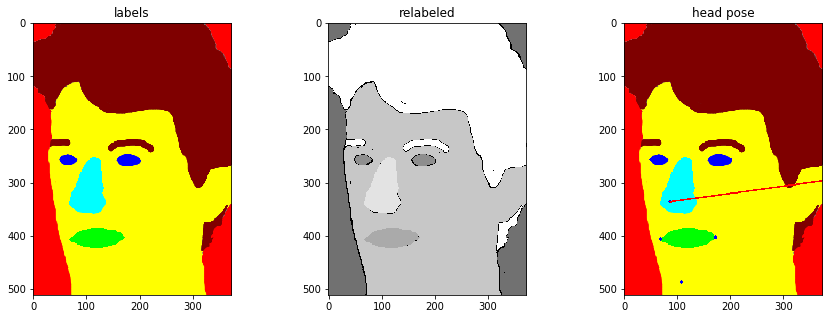


personne15148+0+30.bmp


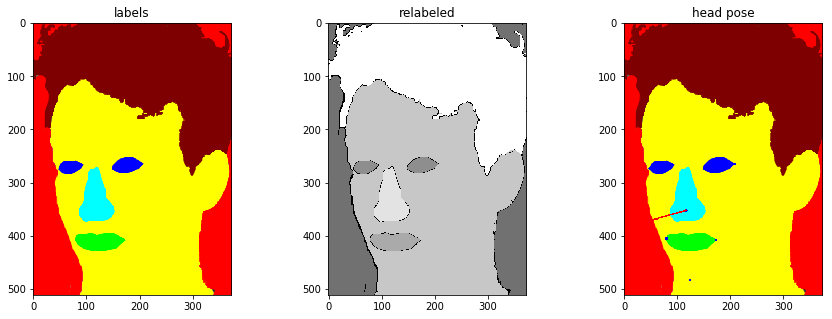


personne15248+0+30.bmp


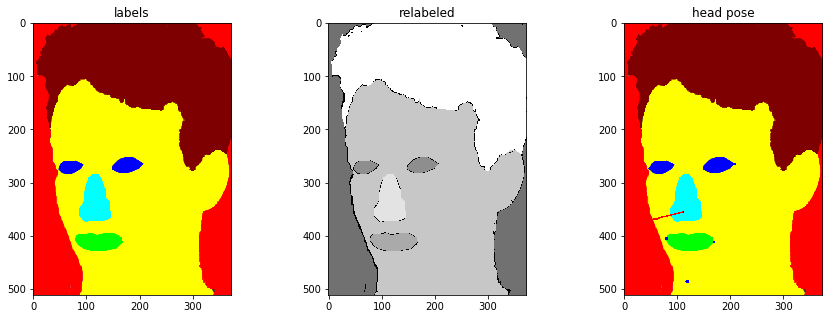


personne08146+0+0.bmp


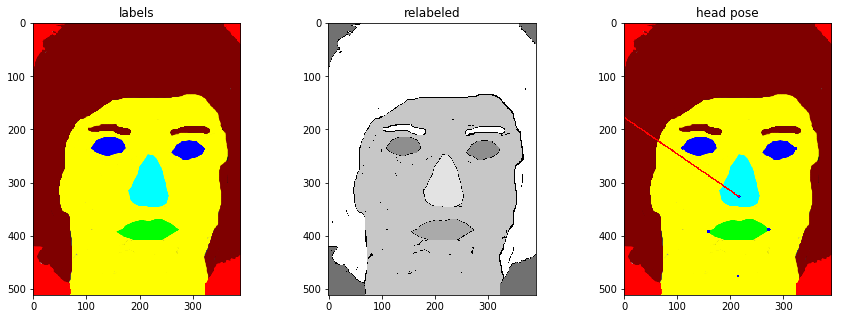


personne08246+0+0.bmp


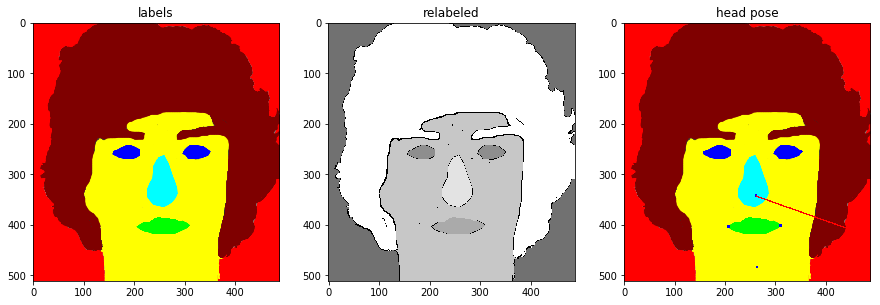


personne09146+0+0.bmp


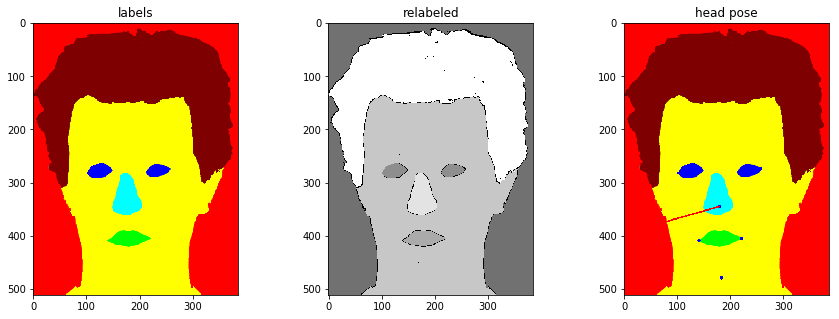


personne09246+0+0.bmp


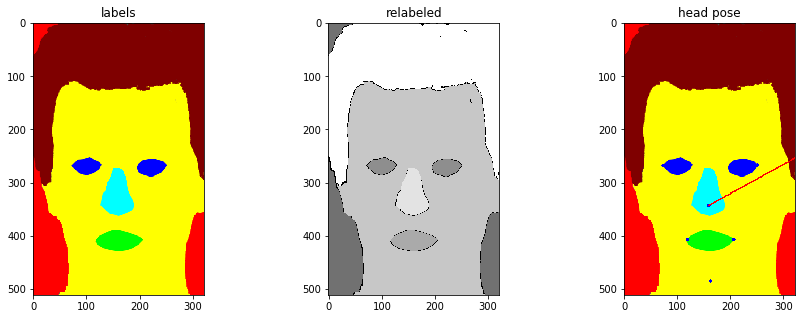


personne10146+0+0.bmp


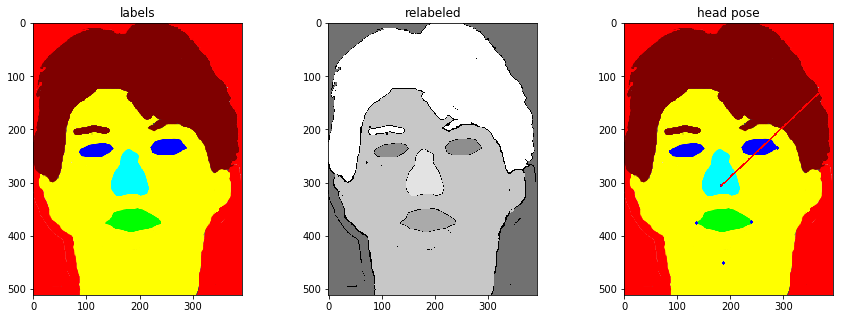


personne10246+0+0.bmp


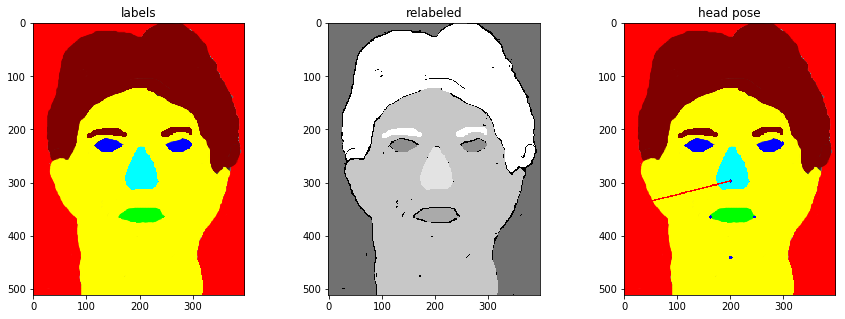


personne11146+0+0.bmp


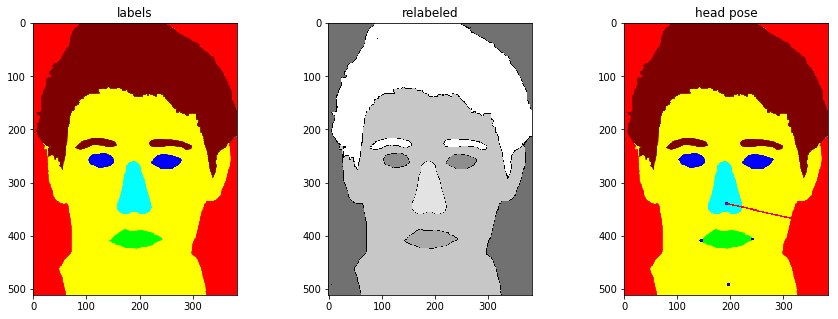


personne11246+0+0.bmp


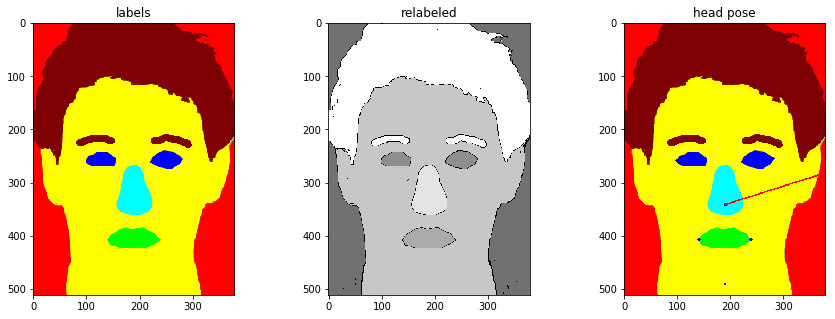


personne12146+0+0.bmp


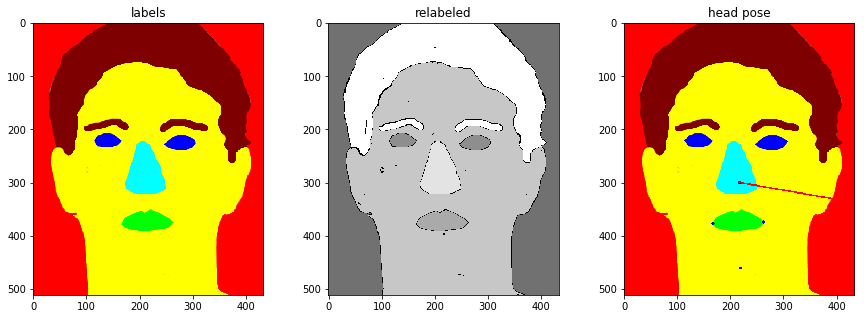


personne12246+0+0.bmp


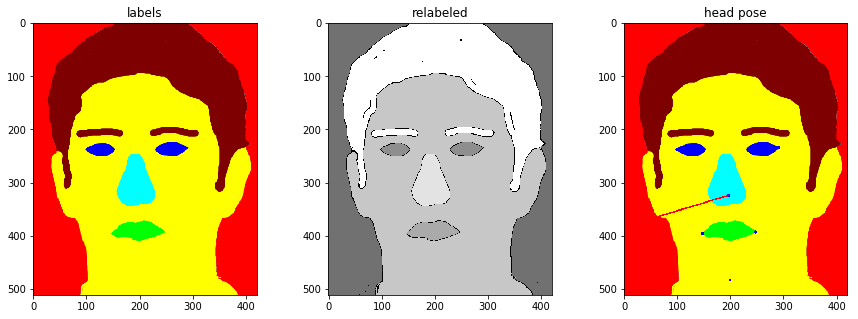


personne13146+0+0.bmp


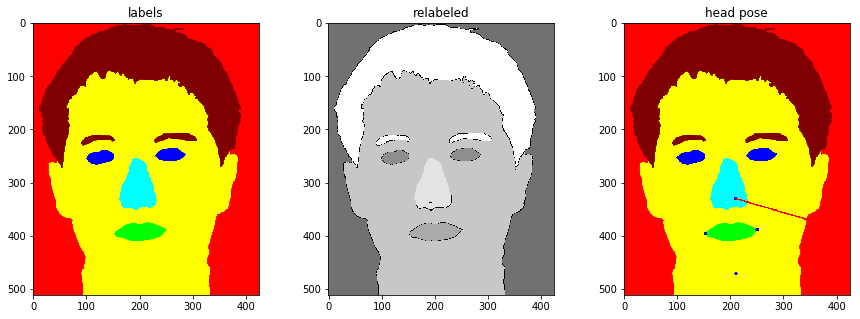


personne13246+0+0.bmp


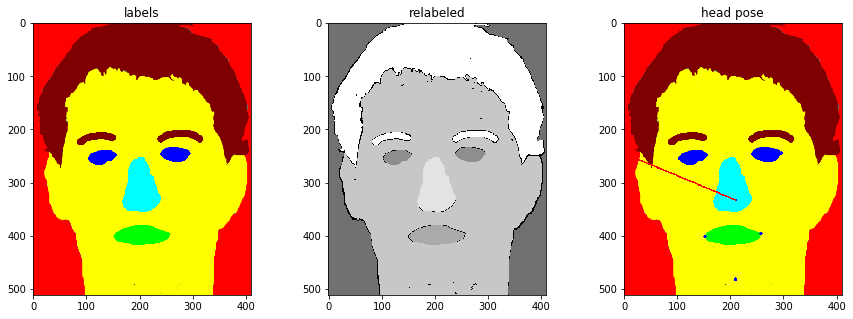


personne14146+0+0.bmp


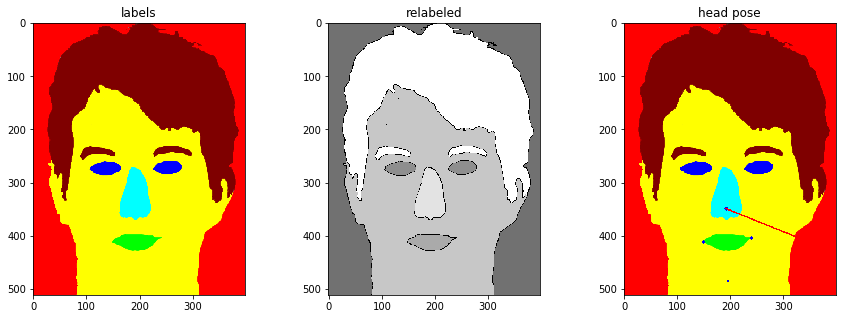


personne14246+0+0.bmp


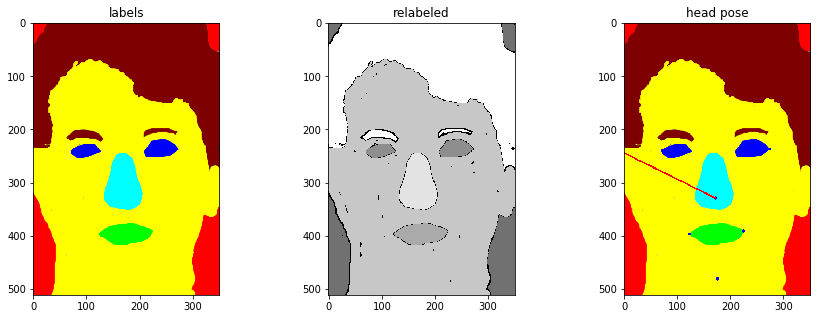


personne15146+0+0.bmp


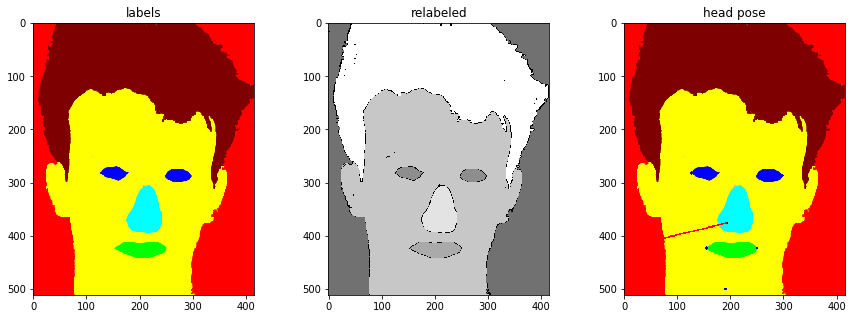


personne15246+0+0.bmp


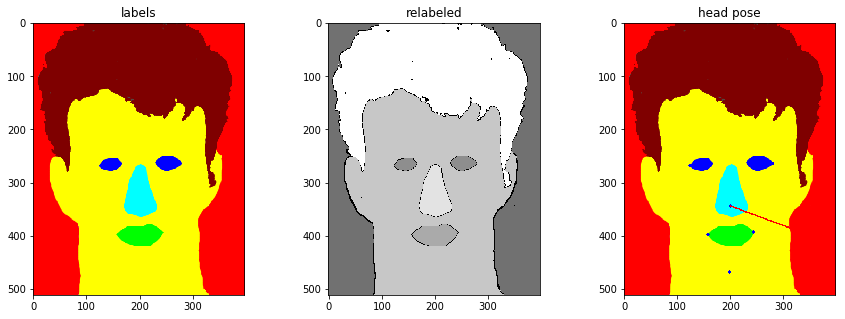


personne08144+0-30.bmp


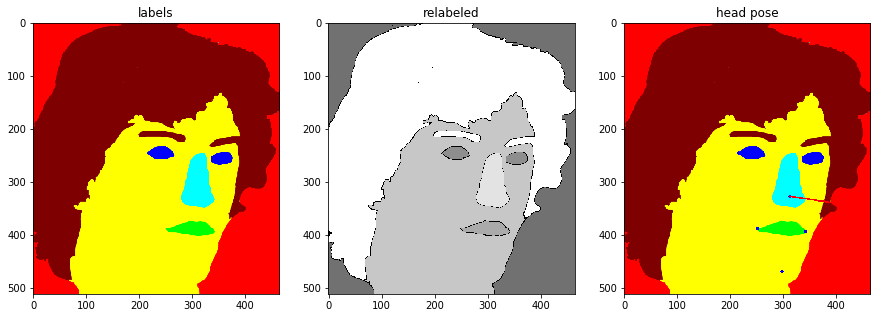


personne08244+0-30.bmp


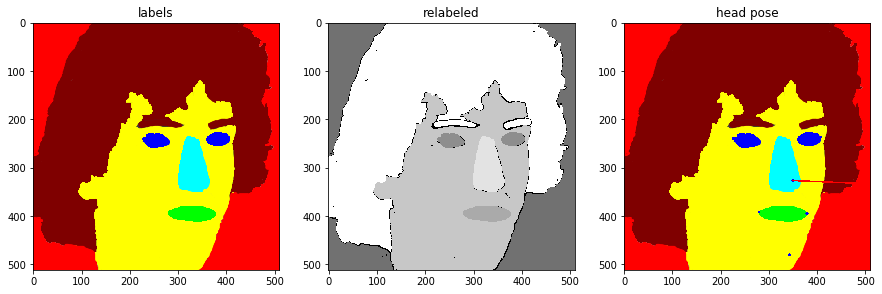


personne09144+0-30.bmp


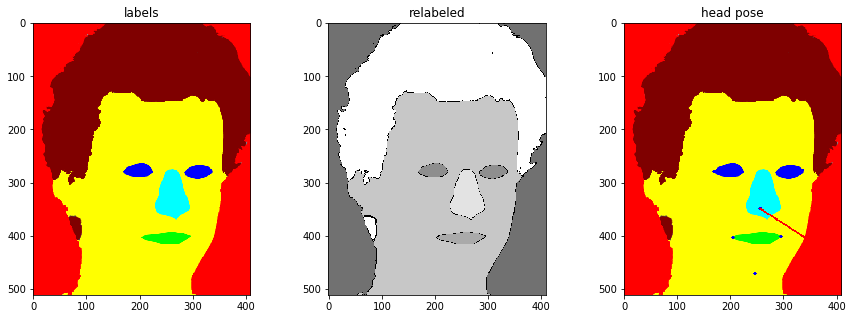


personne09244+0-30.bmp


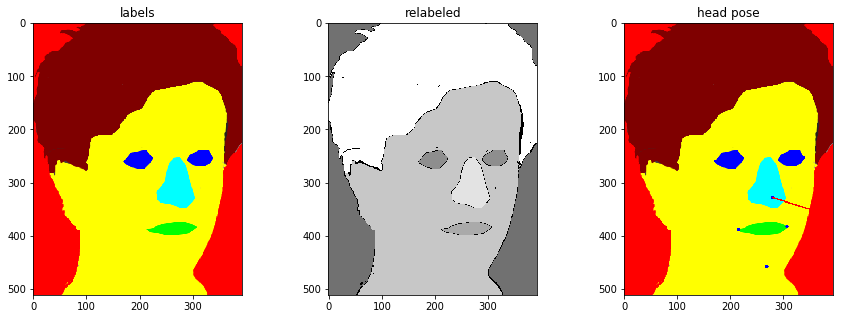


personne10144+0-30.bmp


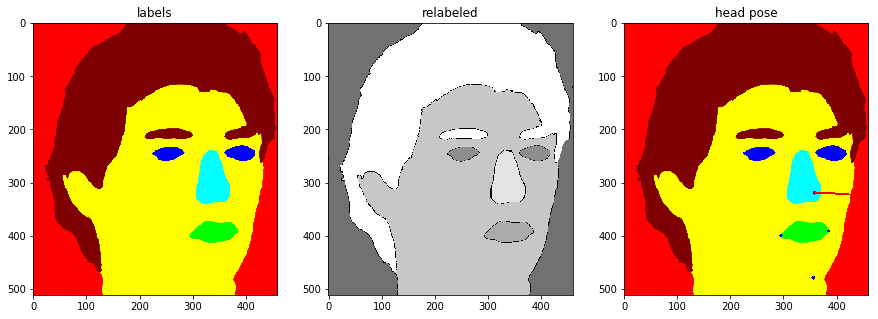


personne10244+0-30.bmp


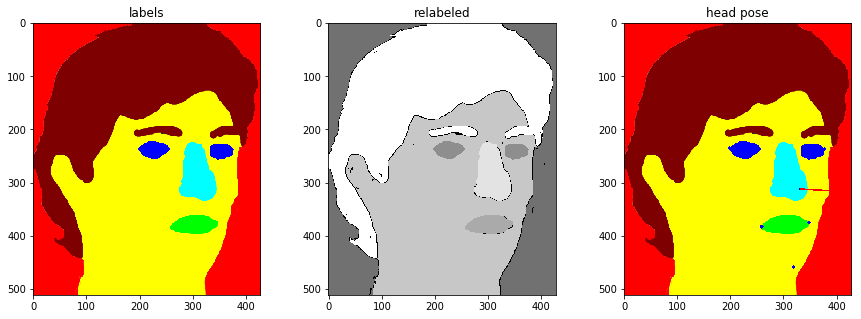


personne11144+0-30.bmp


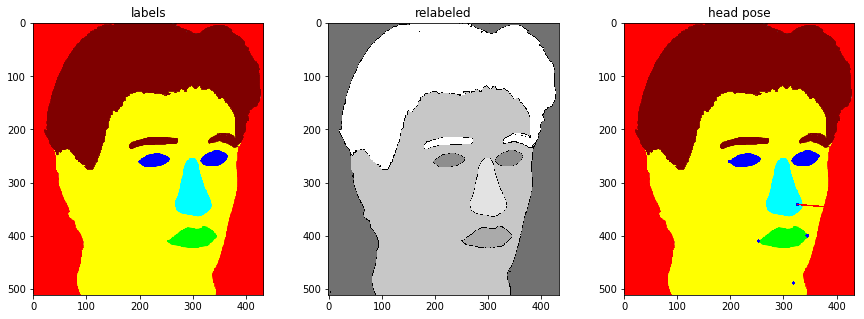


personne11244+0-30.bmp


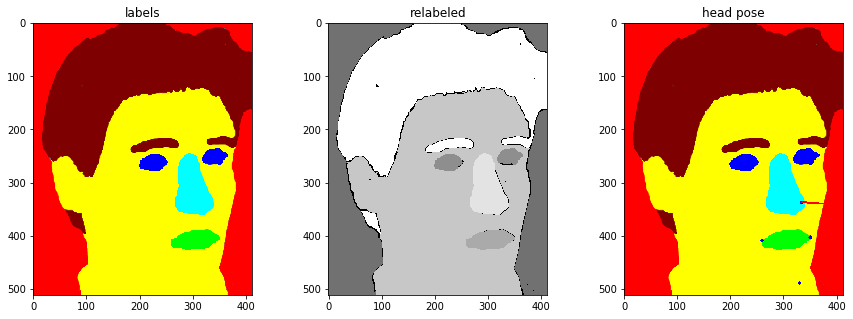


personne12144+0-30.bmp


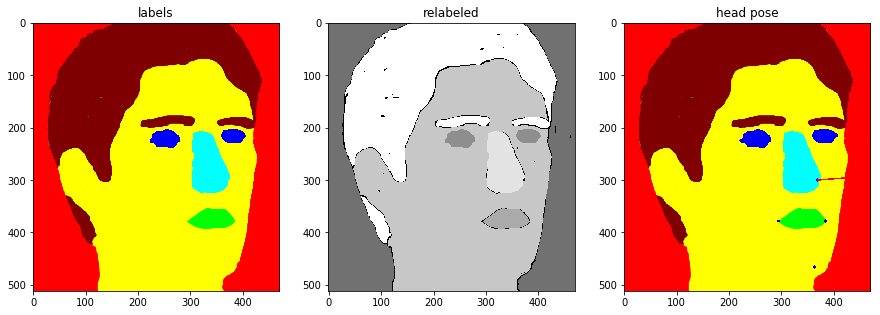


personne12244+0-30.bmp


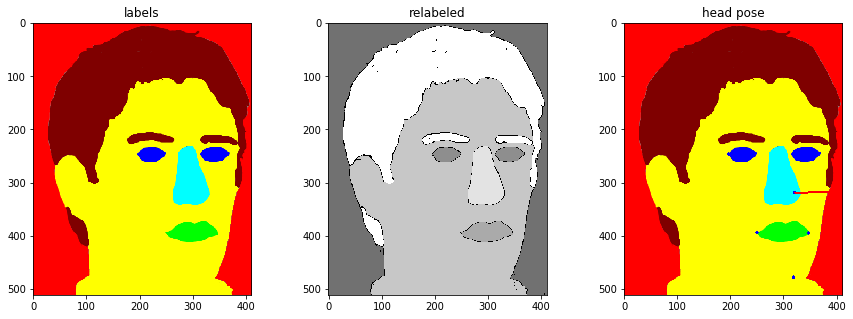


personne13144+0-30.bmp


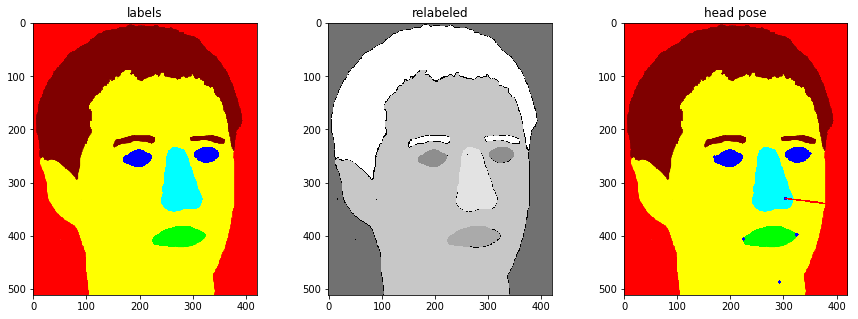


personne13244+0-30.bmp


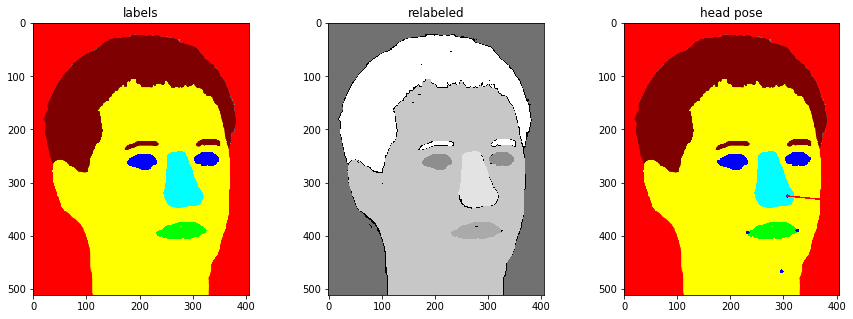


personne14144+0-30.bmp


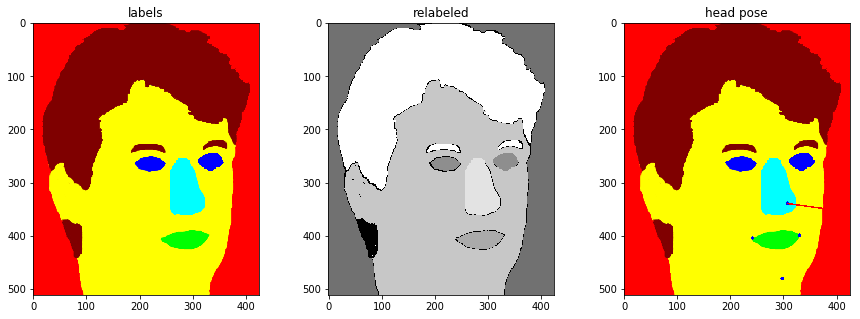


personne14244+0-30.bmp


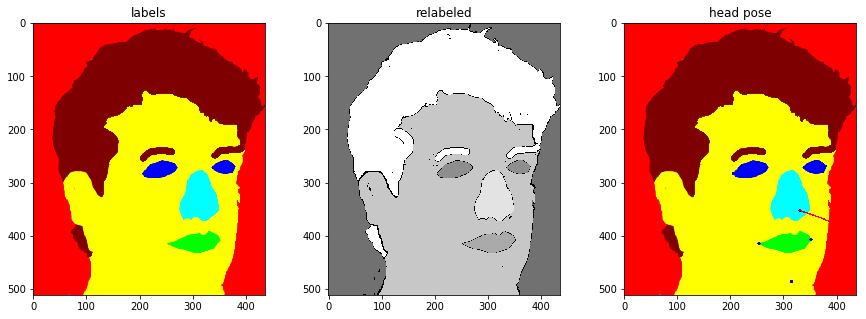


personne15144+0-30.bmp


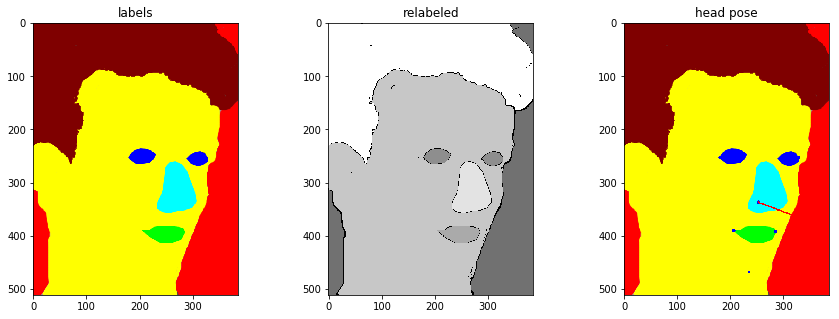


personne15244+0-30.bmp


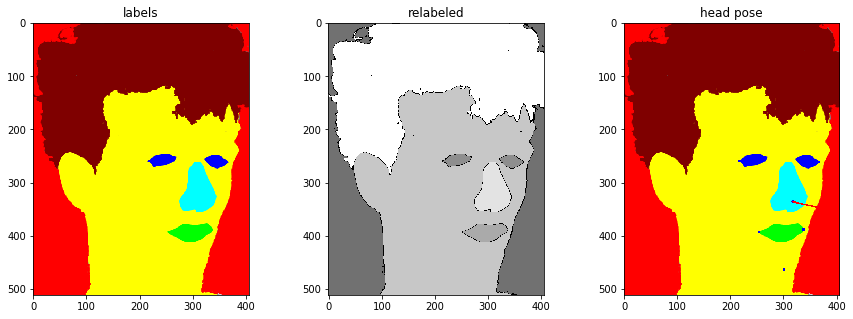


personne08142+0-60.bmp


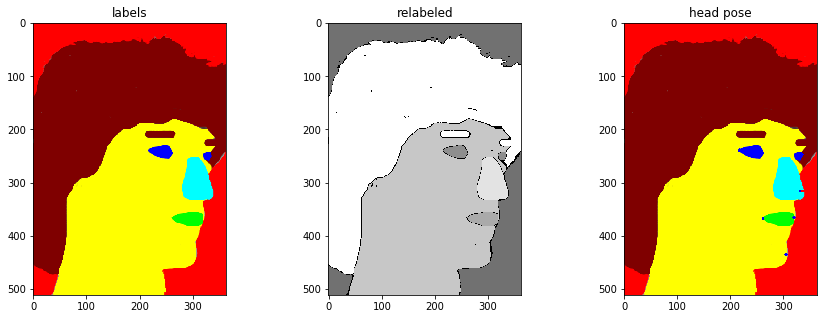


personne08242+0-60.bmp


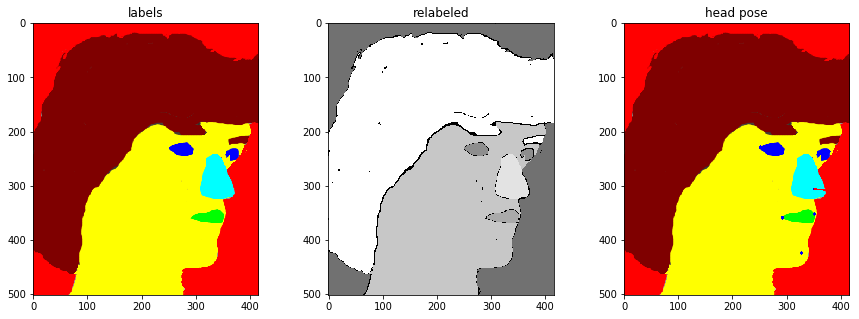


personne09142+0-60.bmp


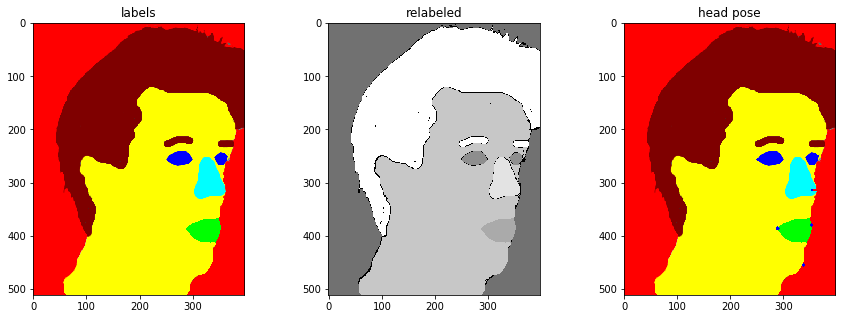


personne09242+0-60.bmp


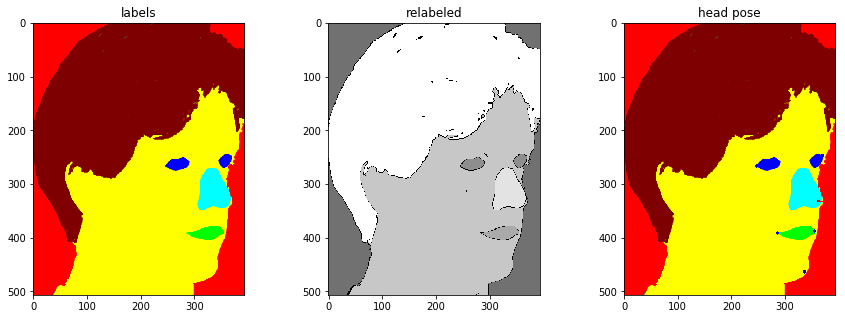


personne10142+0-60.bmp


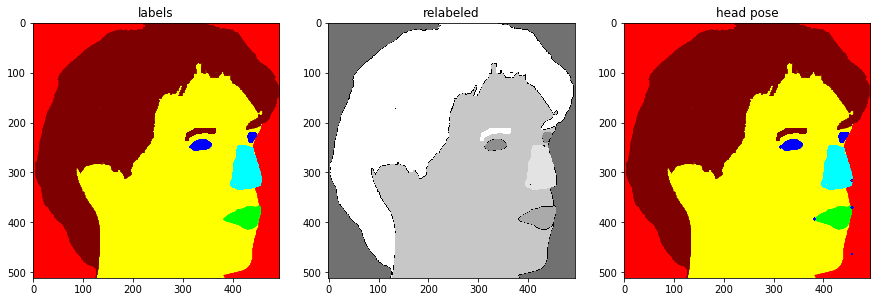


personne10242+0-60.bmp


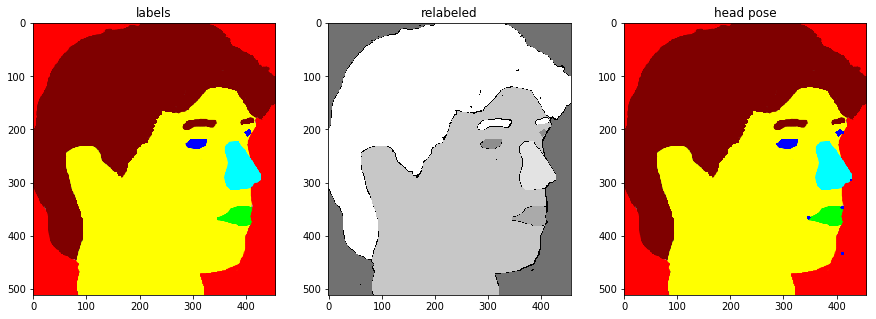


personne11142+0-60.bmp


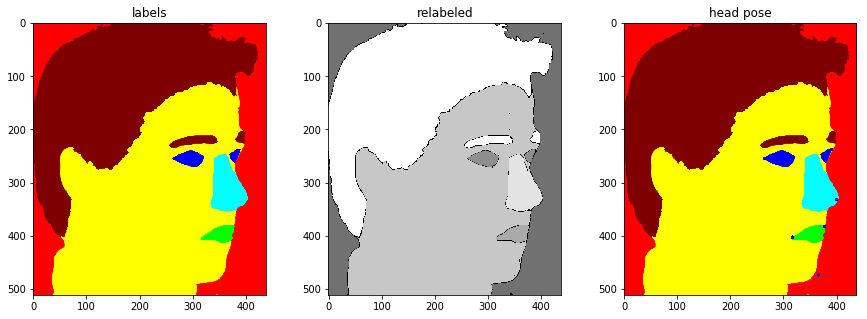


personne11242+0-60.bmp


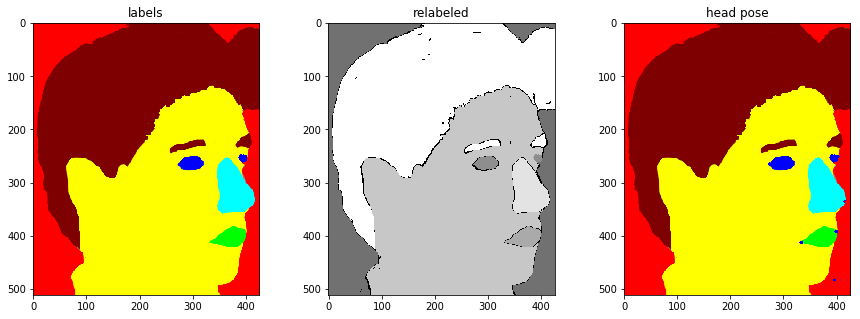


personne12142+0-60.bmp


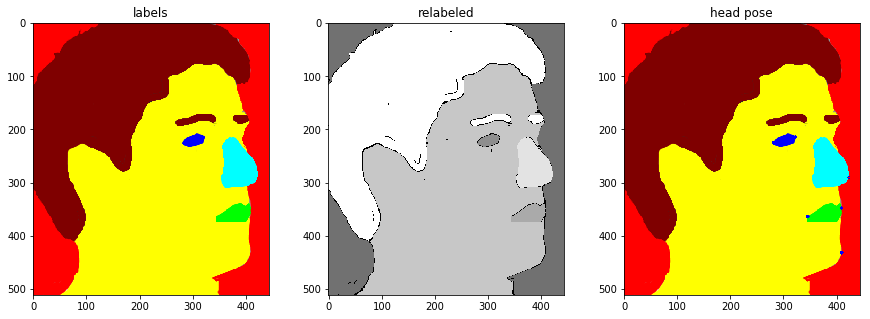


personne12242+0-60.bmp


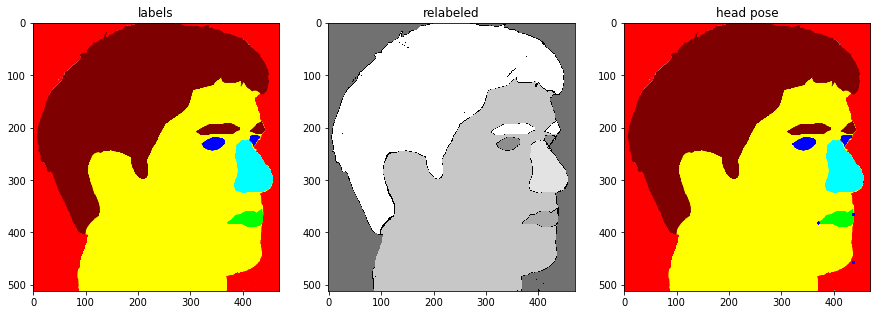


personne13142+0-60.bmp


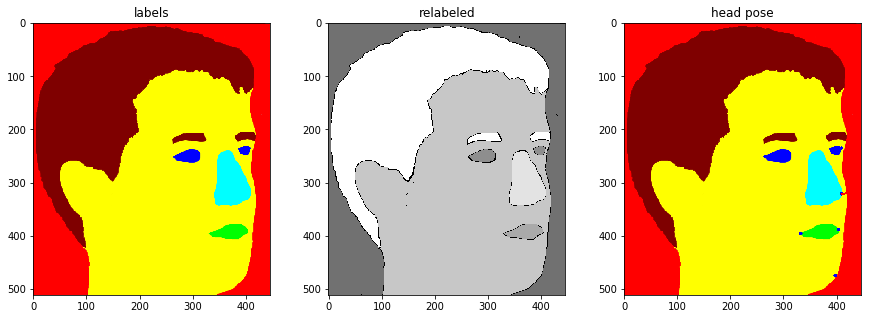


personne13242+0-60.bmp


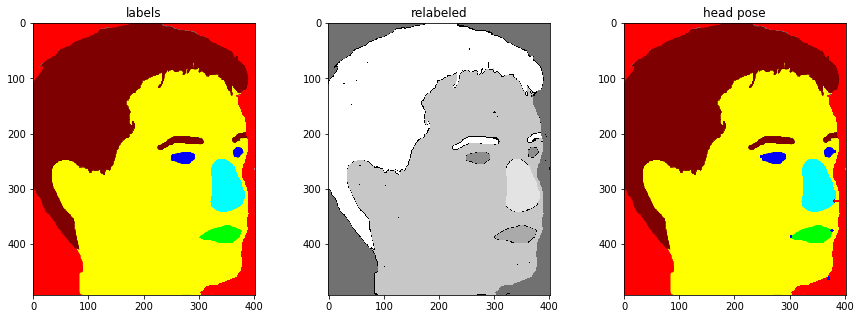


personne14142+0-60.bmp


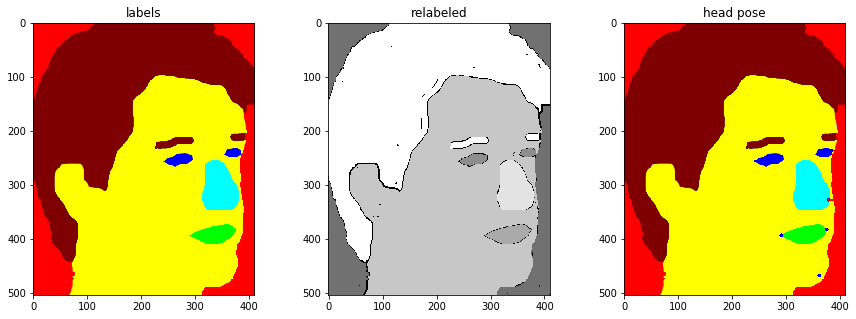


personne14242+0-60.bmp


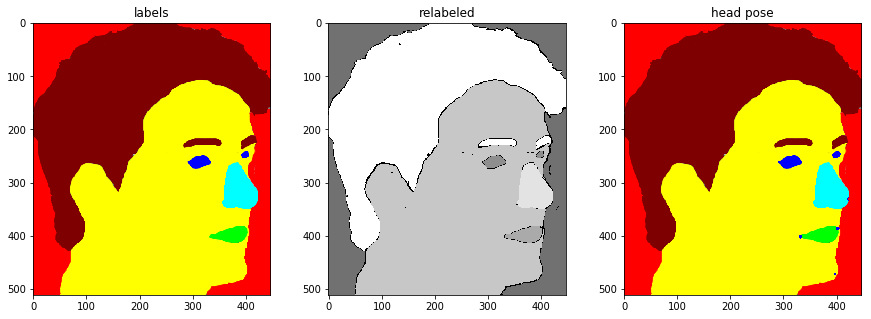


personne15142+0-60.bmp


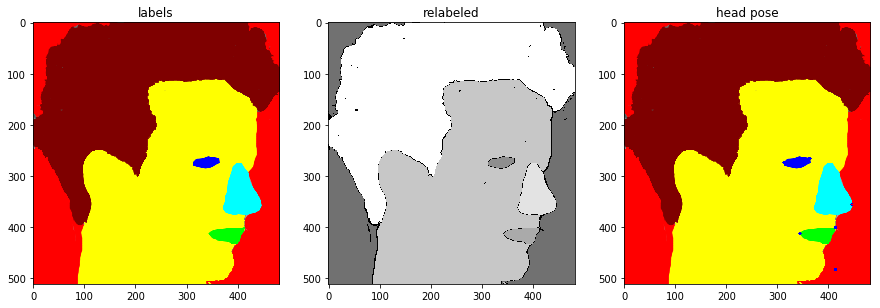


personne15242+0-60.bmp


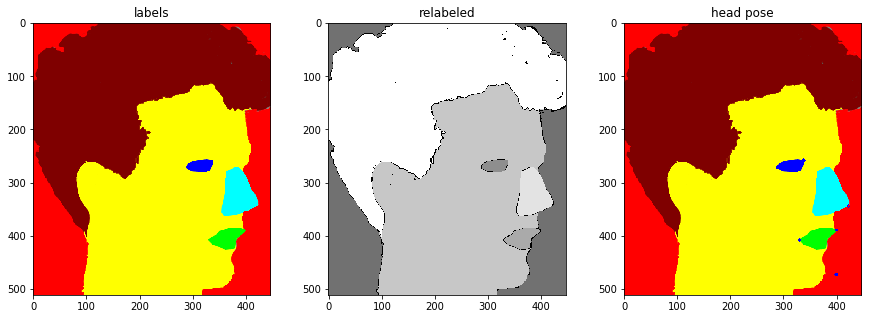

In [97]:
for orientation in ['+90', '+60', '+30', '0', '-30', '-60']:
    os.chdir("C:/Users/Florian Bettini/Desktop/5 - 3A Centrale/2 - Option OMA/10 - VIC/Cours/2 - Project/Data/FASSEG-multipose01/Test_labels/"+ orientation +"/")
    for file in glob.glob("*.bmp"):
        print('')
        print(file)
        img = plt.imread("C:/Users/Florian Bettini/Desktop/5 - 3A Centrale/2 - Option OMA/10 - VIC/Cours/2 - Project/Data/FASSEG-multipose01/Test_labels/"+ orientation + "/" + file)
        plt.figure(figsize=(15,5))

        plt.subplot(1,3,1)
        plt.title('labels')
        plt.imshow(img, cmap='gray')

        plt.subplot(1,3,2)
        plt.title('relabeled')
        img_label = label_image(img)
        plt.imshow(img_label, cmap='gray')

        coordinates = find_points(img_label)
        im = head_pose(img, coordinates)
        plt.subplot(1,3,3)
        plt.title('head pose')
        plt.imshow(im, cmap='gray')
        plt.show()